# Смотрим тестувую выборку

In [1]:
import os
import pandas as pd
from tqdm.auto import tqdm
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
from collections import defaultdict
from hack_lap.utils import BondType

In [2]:
import matplotlib
# matplotlib.use('Qt5Agg')
# %matplotlib qt5
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
filename = os.path.join('..', 'data', 'test.csv')
df = pd.read_csv(filename)
# df = df.loc[:, ['Smiles', 'Active']].astype({'Active': bool})
# df.drop_duplicates(subset=['Smiles'], inplace=True)
df

,Unnamed: 0,Smiles
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...
...,...,...
1609,1609,NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O
1610,1610,Cc1cccc(Nc2ccncc2S(=O)(=O)NC(=O)NC(C)C)c1
1611,1611,CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(...
1612,1612,CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1


In [4]:
df['Active'].value_counts()

False    5351
True      206
Name: Active, dtype: int64

In [4]:
count_atoms = defaultdict(list)
for s in df['Smiles'].tolist():
    mol = Chem.MolFromSmiles(s)
    na = {a.GetSymbol() for a in mol.GetAtoms()}
    for nai in na:
        count_atoms[nai] += [s]
sorted({k: len(v) for k, v in count_atoms.items()}.items(), key=lambda x: -x[1])

[('C', 1613),
 ('O', 1458),
 ('N', 1389),
 ('S', 391),
 ('Cl', 343),
 ('F', 229),
 ('Br', 52),
 ('Na', 35),
 ('P', 29),
 ('I', 24),
 ('B', 6),
 ('As', 3),
 ('K', 3),
 ('H', 1),
 ('Zn', 1)]

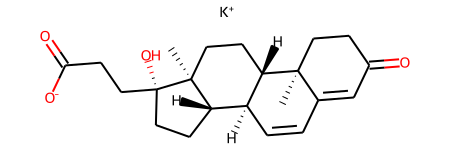

In [9]:
name = 'K'
s = count_atoms[name][0]
mol = Chem.MolFromSmiles(s)
mol